# Toronto City – Accident data analysis and building a prediction model to predict severity of accident injury


## Term Project, 3251 – Statistics for Data Sciences, 23-June-2019

In [59]:
__author__ = "Sakshi Sharma, Sridhar Mani, Thangappa Tamilarasan, Vijayalakshmi TA "
__copyright__ = "Copyright 2019"
__license__ = "GPL"
__version__ = "1.1"
__status__ = "Submitted for Grading"
__Group__ = "1"

# 1.0	 Introduction:

Traffic accidents are caused by various factors including but not limited to distracted driving, poor driving conditions, vehicle malfunction, careless driving etc. According to the World Health Organization, road traffic injuries caused an estimated 1.35 million deaths worldwide in the year 2016.That is, one person is killed every 25 seconds. Good news is that traffic accidents and critical injury rate in Toronto has been on the decline for the last decade. This is attributed to various reasons such as more awareness among drivers, better infrastructure, higher safety standards in cars etc. While there is a steady decline in the traffic related accident and resulting serious injury, there is a need for an in-depth analysis of accident data and a predictive model which can predict the criticality of an injury when an accident happens based on various parameters. This key information can be applied in various fields such as hospitals to plan and effectively utilize their resources, insurance companies to optimize insurance rates etc. 

Objective of this project is twofold.
1.	Build a prediction model which can predict the severity of an injury when a road related traffic accident happens in Toronto area based on various parameters such as – 1) time of the day 2) neighbourhood 3) road conditions 4) visibility conditions 5) month of the year 

2.	Based on sample data received, test the alternate hypothesis that severely injured monthly accident rate of last four-year period (2014-2018) is lesser than the severely injured monthly accident rate of previous four-year period (2010 – 2014).

# 2.0	Data

Source of the data is the Toronto City - killed or severely injured (KSI) accident data set. This data set has information associated with reported accidents in Toronto area between the year 2007 and 2017.

# 3.0	Building a predictive model:

Following algorithms were used to build a predictive model to predict the seriousness / criticality of injury based on various parameters. 
•	Logistic Regression
•	Random Forest Classifier 

Listed below are the steps followed in building a predictive model:
- Loading the data set
- Analysing the data
- Transforming the data
- Building the model
- Testing & tuning the model
- Accuracy score analysis

# 3.1 Introduction to the models:

### 3.1.1	Random Forecast Classification:
            
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

### 3.1.2	Logistic Regression Classification:
            
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". 

# 3.2 Loading the data set:

Data was loaded into Python – Jupyter notebook for analysis and model building. Data from CSV was loaded into a Pandas DataFrame object.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(14,9)})
from datetime import datetime
import statsmodels.formula.api as sm
import statsmodels.graphics
from collections import Counter
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import itertools

In [2]:
# Load data
file_path='KSI.csv'
raw_data=pd.read_csv(file_path)
# Convert columns to lower case
raw_data.columns = raw_data.columns.str.lower()
raw_data.head(2)

,x,y,index_,accnum,year,date,time,hour,street1,street2,...,ag_driv,redlight,alcohol,disability,division,ward_name,ward_id,hood_id,hood_name,fid
0,-79.38349,43.651545,6666068,1249781,2011,2011-08-04T04:00:00.000Z,2318,23,QUEEN ST W,YORK ST,...,,,,,D52,Toronto Centre-Rosedale (27),27,76,Bay Street Corridor (76),12001
1,-79.30049,43.780445,7542240,1311542,2012,2012-08-19T04:00:00.000Z,2318,23,SHEPPARD AVE E,AMETHYST RD,...,Yes,,,,D42,Scarborough-Agincourt (40),40,118,Tam O'Shanter-Sullivan (118),12002


# 3.3 Data Analysis:
	
The loaded data was analysed for completeness and integrity. There were 12557 entries in the CSV data set which was loaded into the DataFrame. A careful analysis of all the columns were performed and the columns which are not deemed critical for analysis and predictive modelling were removed. Following are the list of columns which were removed from the dataframe as they had no significance to data analysis or modelling.


In [3]:
# Study data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 57 columns):
x                12557 non-null float64
y                12557 non-null float64
index_           12557 non-null int64
accnum           12557 non-null int64
year             12557 non-null int64
date             12557 non-null object
time             12557 non-null int64
hour             12557 non-null int64
street1          12557 non-null object
street2          12557 non-null object
offset           12557 non-null object
road_class       12557 non-null object
district         12557 non-null object
latitude         12557 non-null float64
longitude        12557 non-null float64
loccoord         12557 non-null object
accloc           12557 non-null object
traffctl         12557 non-null object
visibility       12557 non-null object
light            12557 non-null object
rdsfcond         12557 non-null object
acclass          12557 non-null object
impactype        12557 non-null ob

In [4]:
# Get column names
raw_data.columns

Index(['x', 'y', 'index_', 'accnum', 'year', 'date', 'time', 'hour', 'street1',
       'street2', 'offset', 'road_class', 'district', 'latitude', 'longitude',
       'loccoord', 'accloc', 'traffctl', 'visibility', 'light', 'rdsfcond',
       'acclass', 'impactype', 'invtype', 'invage', 'injury', 'fatal_no',
       'initdir', 'vehtype', 'manoeuver', 'drivact', 'drivcond', 'pedtype',
       'pedact', 'pedcond', 'cyclistype', 'cycact', 'cyccond', 'pedestrian',
       'cyclist', 'automobile', 'motorcycle', 'truck', 'trsn_city_veh',
       'emerg_veh', 'passenger', 'speeding', 'ag_driv', 'redlight', 'alcohol',
       'disability', 'division', 'ward_name', 'ward_id', 'hood_id',
       'hood_name', 'fid'],
      dtype='object')

In [5]:
# drop columns that are not needed for analysis and building the model 
columns_to_drop=['x','y','index_','acclass','accnum', 'street1',
       'street2', 'offset',
       'loccoord', 'accloc', 'traffctl', 'impactype', 'invtype', 'invage', 'fatal_no',
       'initdir', 'vehtype', 'manoeuver', 'drivact', 'drivcond', 'pedtype',
       'pedact', 'pedcond', 'cyclistype', 'cycact', 'cyccond', 'pedestrian',
       'cyclist', 'automobile', 'motorcycle', 'truck', 'trsn_city_veh',
       'emerg_veh', 'passenger', 'speeding', 'ag_driv', 'redlight', 'alcohol',
       'disability', 'division', 'ward_name', 'hood_id',
       'hood_name', 'fid']

In [6]:
# Retain only the columns needed for analysis
df1 = raw_data.drop(columns=columns_to_drop, axis=1)
df1.head(2)

,year,date,time,hour,road_class,district,latitude,longitude,visibility,light,rdsfcond,injury,ward_id
0,2011,2011-08-04T04:00:00.000Z,2318,23,Major Arterial,Toronto East York,43.651545,-79.38349,Clear,Dark,Dry,None,27
1,2012,2012-08-19T04:00:00.000Z,2318,23,Major Arterial,Scarborough,43.780445,-79.30049,Clear,"Dark, artificial",Dry,Minimal,40


# 3.4	Data Transformation:
	
As majority of the data attributes are categorical, the data attributes are transformed into numerical values for ease of analysis, consistency and building a prediction model. New data attributes were engineered using available data and some of the existing data attributes were transformed. Below table outlines the list of all new data attributes engineering and existing attributes that were transformed for model building purposes. 

**Transform Date**

In [7]:
# Transform date
df1['date']= df1['date'].apply(lambda x : x[:10])
df1['date']=pd.to_datetime(df1['date'])
# Populate month
df1['accident_month'] = df1['date'].dt.month
# Drop date
df1.drop('date', axis=1, inplace=True)
df1.head(2)

,year,time,hour,road_class,district,latitude,longitude,visibility,light,rdsfcond,injury,ward_id,accident_month
0,2011,2318,23,Major Arterial,Toronto East York,43.651545,-79.38349,Clear,Dark,Dry,None,27,8
1,2012,2318,23,Major Arterial,Scarborough,43.780445,-79.30049,Clear,"Dark, artificial",Dry,Minimal,40,8


**Transform Injury**

In [8]:
# Transform accident injury - Serious or Non-Serious
df1.injury.unique()

array(['None', 'Minimal', 'Fatal', ' ', 'Major', 'Minor'], dtype=object)

In [9]:
# Transform accident injury - Critical or Non Critical
def critical_injury(injury):
    if injury in ('Fatal','Major'):
        return 1
    else:
        return 0

In [10]:
df1['critically_injured'] = df1['injury'].apply(critical_injury)
#Drop injury
df1.drop('injury', axis=1, inplace=True)
df1.head(2)

,year,time,hour,road_class,district,latitude,longitude,visibility,light,rdsfcond,ward_id,accident_month,critically_injured
0,2011,2318,23,Major Arterial,Toronto East York,43.651545,-79.38349,Clear,Dark,Dry,27,8,0
1,2012,2318,23,Major Arterial,Scarborough,43.780445,-79.30049,Clear,"Dark, artificial",Dry,40,8,0


**Transform Time**

    - `Night` = Midnight to 6:00 am (Code '1')
    - `Rush Hour` = 7:00 am to 10:00 am; 4:00pm to 7:00pm (Code '2')
    - `Regular` = Rest (Code '3')

In [11]:
def get_time(t):
    if (t>=0 and t<6):
        return 1
    elif (t >=7 and t <10 ):
        return 2
    elif (t >=16 and t <19):
        return 2
    else:
        return 3

In [12]:
# Add new column - time_period
df1['time_period']= df1['hour'].apply(get_time)
# drop time column
df1.drop(columns=['time','year','hour'], axis=1, inplace=True)
df1.head(2)

,road_class,district,latitude,longitude,visibility,light,rdsfcond,ward_id,accident_month,critically_injured,time_period
0,Major Arterial,Toronto East York,43.651545,-79.38349,Clear,Dark,Dry,27,8,0,3
1,Major Arterial,Scarborough,43.780445,-79.30049,Clear,"Dark, artificial",Dry,40,8,0,3


**Road Classification**

In [13]:
def road_classification(road_class):
    if road_class in ('Expressway'):
        return 1
    else:
        return 2

In [14]:
# Apply road classification
# 1 - ('Expressway')
# 2 - ('Collectors',Major Arterial', 'Minor Arterial','Local', 'Major Arterial Ramp', 'Expressway Ramp', 'Laneway')
df1['road_type'] = df1['road_class'].apply(road_classification)
# Drop road_class
df1.drop(columns='road_class', axis=1, inplace=True)
df1.head(2)

,district,latitude,longitude,visibility,light,rdsfcond,ward_id,accident_month,critically_injured,time_period,road_type
0,Toronto East York,43.651545,-79.38349,Clear,Dark,Dry,27,8,0,3,2
1,Scarborough,43.780445,-79.30049,Clear,"Dark, artificial",Dry,40,8,0,3,2


**Visibility Transformation**
 
 Apply driving conditions
     1. Good
     2. Moderate
     3. Poor

In [15]:
df1.visibility.unique()

array(['Clear', 'Rain', 'Freezing Rain', 'Snow', 'Other',
       'Fog, Mist, Smoke, Dust', 'Drifting Snow', 'Strong wind', ' '],
      dtype=object)

In [16]:
# driving conditions
def driving_conditions(visibility):
    if visibility in ('Clear',''):
        return 1 # Good
    elif visibility in ('Freezing Rain','Snow','Drifting Snow','Fog'):
        return 3 # Poor
    else:
        return 2 # Moderate

In [17]:
df1['poor_driving_conditions'] = df1['visibility'].apply(driving_conditions)
# Drop visibility
df1.drop(columns='visibility', axis=1, inplace=True)
df1.head(2)

,district,latitude,longitude,light,rdsfcond,ward_id,accident_month,critically_injured,time_period,road_type,poor_driving_conditions
0,Toronto East York,43.651545,-79.38349,Dark,Dry,27,8,0,3,2,1
1,Scarborough,43.780445,-79.30049,"Dark, artificial",Dry,40,8,0,3,2,1


In [18]:
# Drop light and rdsfcond
df1.drop(columns=['light','rdsfcond'], axis=1, inplace=True)
df1.head(2)

,district,latitude,longitude,ward_id,accident_month,critically_injured,time_period,road_type,poor_driving_conditions
0,Toronto East York,43.651545,-79.38349,27,8,0,3,2,1
1,Scarborough,43.780445,-79.30049,40,8,0,3,2,1


**District Tranformation**

In [19]:
# Unique district values
df1.district.unique()

array(['Toronto East York', 'Scarborough', 'Etobicoke York', 'North York',
       ' ', 'No District'], dtype=object)

In [20]:
# District
def district_mapping(district):
    if district in ('Toronto East York'):
        return 1
    elif district in ('Scarborough'):
        return 2
    elif district in ('Etobicoke York'):
        return 3
    elif district in ('North York'):
        return 4
    elif district in (' ', 'No District'):
        return 0

In [21]:
df1['district_code'] = df1['district'].apply(district_mapping)
df1.drop(columns='district', axis=1, inplace=True)
df1.head(2)

,latitude,longitude,ward_id,accident_month,critically_injured,time_period,road_type,poor_driving_conditions,district_code
0,43.651545,-79.38349,27,8,0,3,2,1,1
1,43.780445,-79.30049,40,8,0,3,2,1,2


In [22]:
#Drop ward_id
df1.drop(columns='ward_id', axis=1, inplace=True)
df1.head(2)

,latitude,longitude,accident_month,critically_injured,time_period,road_type,poor_driving_conditions,district_code
0,43.651545,-79.38349,8,0,3,2,1,1
1,43.780445,-79.30049,8,0,3,2,1,2


In [23]:
# Remove rows with no district values populated 
df1 = df1[df1.district_code != 0] #Only 10 rows
df1.head(2)

,latitude,longitude,accident_month,critically_injured,time_period,road_type,poor_driving_conditions,district_code
0,43.651545,-79.38349,8,0,3,2,1,1
1,43.780445,-79.30049,8,0,3,2,1,2


**Season Tranformation**

Change month category as Seasons

In [24]:
# Change month category as Seasons
def season_code(month):
    if month in (12,1,2,3):
        return 1 # Winter
    elif month in (4,5,6):
        return 2 # Spring
    elif month in (7,8,9):
        return 3 # Summer
    else:
        return 4 # Fall

In [25]:
# Apply Season code
df1['season_code'] = df1['accident_month'].apply(season_code)
# Drop visibility
df1.drop(columns='accident_month', axis=1, inplace=True)
df1.head(2)

,latitude,longitude,critically_injured,time_period,road_type,poor_driving_conditions,district_code,season_code
0,43.651545,-79.38349,0,3,2,1,1,3
1,43.780445,-79.30049,0,3,2,1,2,3


In [26]:
#Copy transformed data into new dataframe
df2 = df1

# 3.5	Building a prediction Model using Random Forest Classifier method

The accident data set is split into two groups - train and test. 25% of data is randomly selected as test data set while remaining 75% data is selected as training data set. The training data is then fitted under Random Forest Classifier model. Once fitted, the test data set is running against the fitted model and as below results indicate, this model resulted in a weighted average prediction of 50%. 

In [27]:
#Define response variable (y) and predictor variables (x)
X = df2.drop('critically_injured',axis=1)
y = df2['critically_injured']

In [28]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=7)
# Run random forecast classifier model; apply RFC
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
# Check accuracy of model prediction
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56      1983
           1       0.15      0.12      0.13      1153

   micro avg       0.42      0.42      0.42      3136
   macro avg       0.34      0.35      0.35      3136
weighted avg       0.39      0.42      0.40      3136



In [29]:
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)

[[1165  818]
 [1012  141]]


In [30]:
accuracy_score(y_test, y_pred_rfc)

0.4164540816326531

In [31]:
# Function to Plot confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 16)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize = 12)
        plt.yticks(tick_marks, target_names,fontsize = 12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]), fontsize = 12,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),fontsize = 12,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    #plt.tight_layout()
    plt.ylabel('True label', fontsize = 12)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize = 12)
    plt.grid(None)
    plt.show()

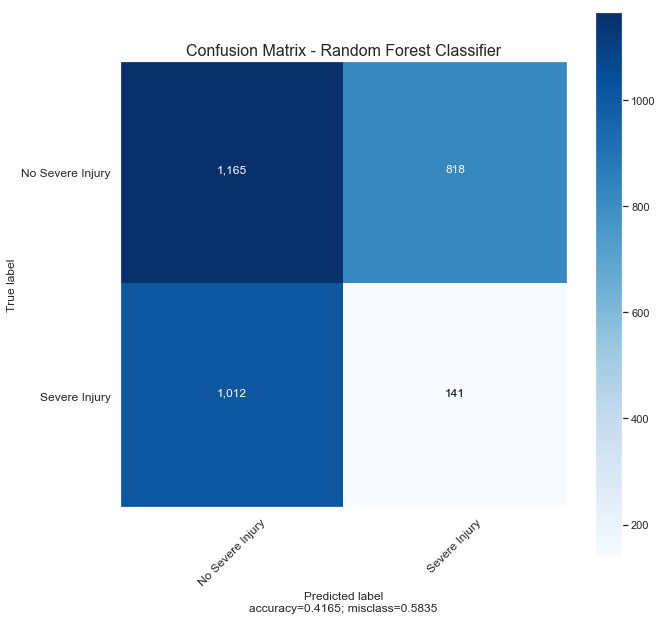

<Figure size 432x288 with 0 Axes>

In [32]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['No Severe Injury','Severe Injury'],
                      title        = "Confusion Matrix - Random Forest Classifier")
plt.savefig('ForA.png')

In [33]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfc)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.3548916877587857

As the prediction accuracy is only 41%, the data is further analysed to find the best parameter (n_estimator) which would give a higher prediction accuracy. A test was conducted for various values of n_estimator [1, 2, 4, 8, 16, 32, 64, 100, 200] and accuracy score was measured.

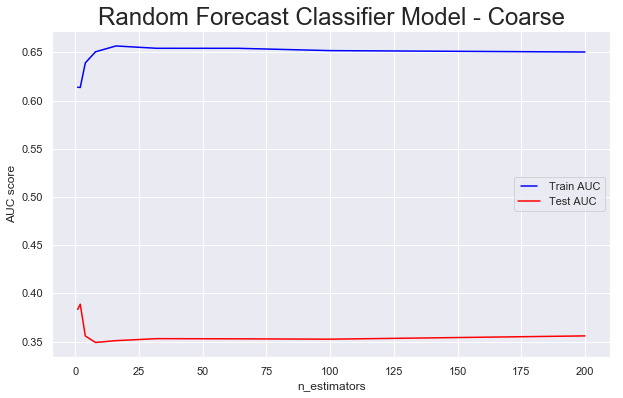

<Figure size 432x288 with 0 Axes>

In [34]:
# Tuning the model
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(10, 6))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, color = 'blue', label= "Train AUC")
line2, = plt.plot(n_estimators, test_results, color = 'red', label= "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Random Forecast Classifier Model - Coarse', fontsize=24)
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()
plt.savefig('ForB.png')

As per the above graph, it is evident that the value of estimators cannot be further adjusted to increase the accuracy score.

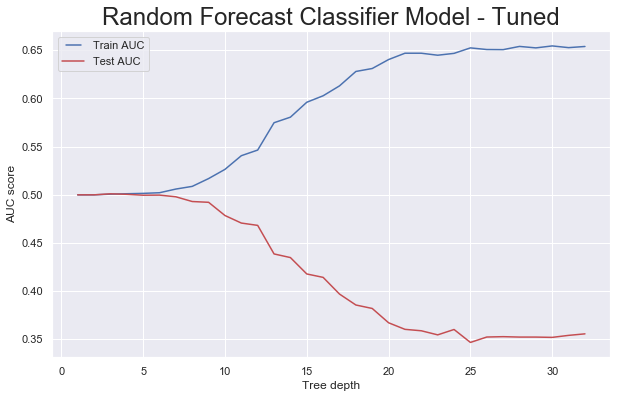

<Figure size 432x288 with 0 Axes>

In [35]:
# Tuning the model
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(10, 6))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Random Forecast Classifier Model - Tuned', fontsize=24)
plt.ylabel('AUC score')
plt.xlabel('Tree depth')

plt.show()
plt.savefig('ForC.png')

In addition to tuning the n_estimator value, various value of max_depth parameter was tested to see if it improves accuracy score. But as the above results indicate, changing the max_depth value doesn’t seem to improve the prediction accuracy significantly.

# 3.6	Building a prediction Model using Logistic Regression method

The accident data set is split into two groups - train and test. 25% of data is randomly selected as test data set while remaining 75% data is selected as training data set. The training data is then fitted under Logistic Regression Model. Once fitted, the test data set is running against the fitted model and as below results indicate, this model resulted in a weighted average prediction of 38%. 

In [36]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=8)

In [37]:
# Initiating Logistic Regression model
log_reg=linear_model.LogisticRegression()
log_reg=log_reg.fit(X_train, y_train)
y_pred_lr=log_reg.predict(X_test)
print(classification_report(y_test,y_pred_lr)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1932
           1       0.00      0.00      0.00      1204

   micro avg       0.62      0.62      0.62      3136
   macro avg       0.31      0.50      0.38      3136
weighted avg       0.38      0.62      0.47      3136



In [38]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[1932    0]
 [1204    0]]


In [39]:
accuracy_score(y_test, y_pred_lr)

0.6160714285714286

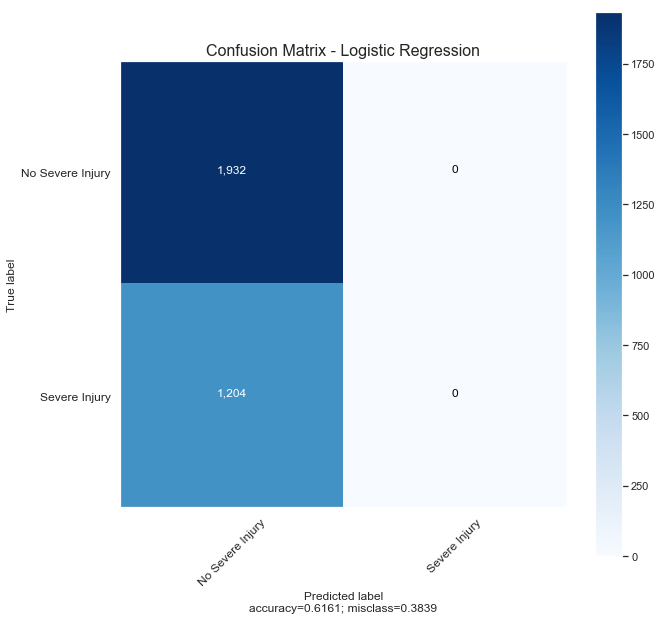

<Figure size 432x288 with 0 Axes>

In [40]:
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['No Severe Injury','Severe Injury'],
                      title        = "Confusion Matrix - Logistic Regression")
plt.savefig('RegA.png')

# 4.0	Hypothesis Testing

# 4.1	Introduction to Hypothesis Testing:

A statistical hypothesis, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. A statistical hypothesis test is a method of statistical inference. Commonly, two statistical data sets are compared, or a data set obtained by sampling is compared against a synthetic data set from an idealized model. A hypothesis is proposed for the statistical relationship between the two data sets, and this is compared as an alternative to an idealized null hypothesis that proposes no relationship between two data sets. The comparison is deemed statistically significant if the relationship between the data sets would be an unlikely realization of the null hypothesis according to a threshold probability—the significance level. Hypothesis tests are used when determining what outcomes of a study would lead to a rejection of the null hypothesis for a pre-specified level of significance.

# 4.2	Framing the hypothesis:

Number of severely injured road accidents in Toronto City is on the decline. To provide this, a hypothesis test is conducted. Null and Alternate Hypothesis are as follows:

1.	Null Hypothesis: There is no difference between monthly average of critically injured road accidents in the recent 4-year period (2014-2018) and previous 4-year period (2010-2014)

<center>$ $H_{0}$ : Mean $(\mu)$ = 36 $</center>

2.	Alternate Hypothesis: monthly average of critically injured road accidents in Toronto City has declined during the 4-year period (2014-2018) when compared with previous 4-year period (2010-2014)

<center>$ $H_{A}$: Mean $(\mu)$ < 36 $</center>

In order to test the above hypothesis, student t-test method was chosen as the data set meets the following criteria to run a student t-test:

- Data sets are independant observation
- Data sets are near normal or normal distribution
- Observations are > 30
- There are no outliers

In [41]:
# Road classification
def road_classification(road_class):
    if road_class in ('Expressway'):
        return 'Expressway'
    else:
        return 'Non Expressway'
    
# Transform accident injury - Severe or Non-Severe
def injury_type(injury):
    if injury in ('Fatal','Major'):
        return 'Severe Injury'
    else:
        return 'Non-Severe Injury'

In [42]:
# Load the raw data data - accident
raw_ksi_data=pd.read_csv(file_path)

# Transform data - column names
column_names=list(raw_ksi_data.columns)
new_col_names=[]
for names in column_names:
    new_col_names.append(names.lower())
ksi_data=raw_ksi_data.copy()
ksi_data.columns=new_col_names

# drop columns that are not needed for analysis
columns_to_drop=['x','y','index_','acclass','accnum', 'street1',
       'street2', 'offset','district', 'latitude', 'longitude',
       'loccoord', 'accloc', 'traffctl', 'impactype', 'invtype', 'invage', 'fatal_no',
       'initdir', 'vehtype', 'manoeuver', 'drivact', 'drivcond', 'pedtype',
       'pedact', 'pedcond', 'cyclistype', 'cycact', 'cyccond', 'pedestrian',
       'cyclist', 'automobile', 'motorcycle', 'truck', 'trsn_city_veh',
       'emerg_veh', 'passenger', 'speeding', 'ag_driv', 'redlight', 'alcohol',
       'disability', 'division', 'ward_name', 'hood_id',
       'hood_name', 'fid']
# Retain only the columns needed for analysis
df3 = ksi_data.drop(columns=columns_to_drop, axis=1)

# Transform date
df3['date']= df3['date'].apply(lambda x : x[:10])
df3['date']=pd.to_datetime(df3['date'])

# Understanding the various types of accidents on road types
df1_contingency = pd.crosstab(df3['injury'],df3['road_class'])
df1_contingency.head()

# Road classification
df3['road_type'] = df3['road_class'].apply(road_classification)

# Transform accident injury - Severe or Non-Severe
df3['injury_type'] = df3['injury'].apply(injury_type)
df3.set_index('date', inplace=True)

# Add column for calculation purposes
df3['accident_count'] = 1
df3.head(2)

,year,time,hour,road_class,visibility,light,rdsfcond,injury,ward_id,road_type,injury_type,accident_count
date,,,,,,,,,,,,
2011-08-04,2011,2318,23,Major Arterial,Clear,Dark,Dry,None,27,Non Expressway,Non-Severe Injury,1
2012-08-19,2012,2318,23,Major Arterial,Clear,"Dark, artificial",Dry,Minimal,40,Non Expressway,Non-Severe Injury,1


In [43]:
# Check if the accident observations are normal or near normal distribution
df3_resampled=pd.DataFrame(df3.accident_count.resample('M').sum())
df3_resampled.head(3)

,accident_count
date,
2007-01-31,102
2007-02-28,123
2007-03-31,114


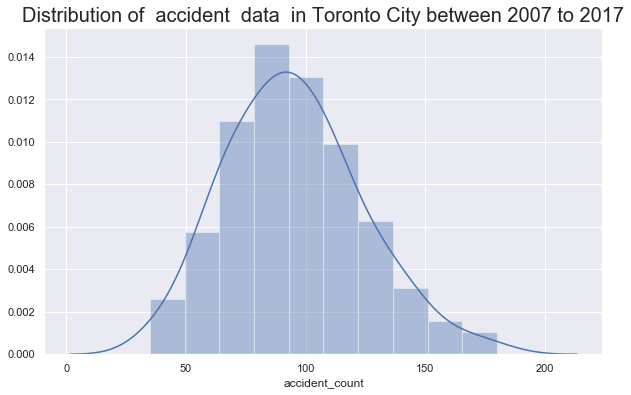

In [44]:
plt.figure(figsize=(10, 6))
sns.distplot(df3_resampled.accident_count,bins=10)
plt.title("Distribution of  accident  data  in Toronto City between 2007 to 2017", fontsize = 20);
plt.savefig('HYP-a.png', bbox_inches='tight')

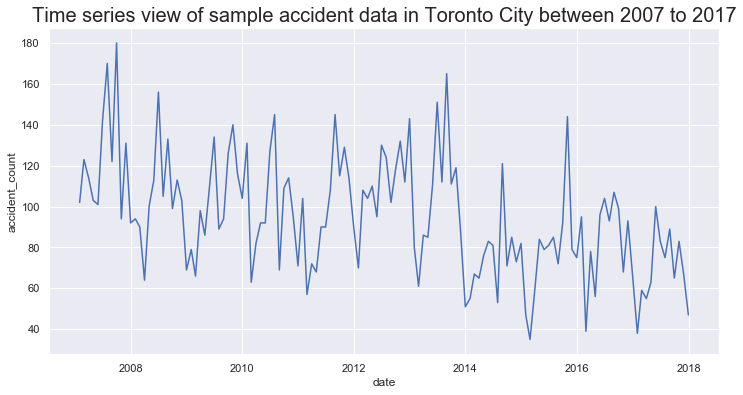

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df3_resampled, x=df3_resampled.index, y='accident_count')
plt.title("Time series view of sample accident data in Toronto City between 2007 to 2017", fontsize = 20);
plt.savefig('HYP-b.png', bbox_inches='tight')

In [46]:
# Different classes of Injury vs Road type where accidents happened
df3_contingency = pd.crosstab(df3['road_type'],df3['injury_type'])
df1_contingency.head()

road_class,Collector,Expressway,Expressway Ramp,Laneway,Local,Major Arterial,Major Arterial Ramp,Minor Arterial
injury,,,,,,,,
,92,58,3,0,69,1018,1,231
Fatal,37,21,1,1,40,395,1,97
Major,265,111,10,1,252,2779,2,734
Minimal,25,36,1,0,29,596,2,104
Minor,34,41,5,0,27,729,0,133


In [47]:
# Sub-setting only severly injured data
df3_severe_injury = df3[df3['injury_type'] == 'Severe Injury']
df3_severe_injury.head()

,year,time,hour,road_class,visibility,light,rdsfcond,injury,ward_id,road_type,injury_type,accident_count
date,,,,,,,,,,,,
2015-12-30,2015,2339,23,Major Arterial,Clear,"Dark, artificial",Dry,Fatal,30,Non Expressway,Severe Injury,1
2012-08-19,2012,2318,23,Major Arterial,Clear,"Dark, artificial",Dry,Major,40,Non Expressway,Severe Injury,1
2017-10-20,2017,2318,23,Major Arterial,Clear,"Dusk, artificial",Dry,Major,5,Non Expressway,Severe Injury,1
2009-02-26,2009,2319,23,Minor Arterial,Clear,Dark,Dry,Major,32,Non Expressway,Severe Injury,1
2014-08-02,2014,2319,23,Major Arterial,Clear,"Dark, artificial",Dry,Major,9,Non Expressway,Severe Injury,1


In [48]:
df3_severe_injury_resampled=pd.DataFrame(df3_severe_injury.accident_count.resample('Y').sum())
df3_severe_injury_resampled.head(5)
#sns.distplot(df1_fatal_injury_resampled.accident_count)

,accident_count
date,
2007-12-31,493
2008-12-31,448
2009-12-31,479
2010-12-31,445
2011-12-31,427


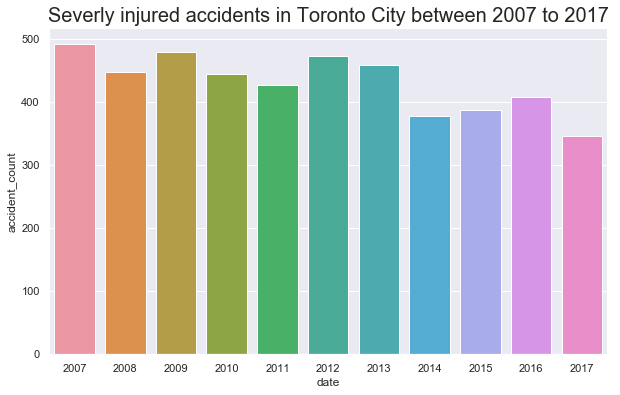

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df3_severe_injury_resampled, y=df3_severe_injury_resampled.accident_count, 
            x=df3_severe_injury_resampled.index.year)
plt.title("Severly injured accidents in Toronto City between 2007 to 2017", fontsize = 20);
plt.savefig('HYP-c.png', bbox_inches='tight')

In [50]:
#df1_severe_injury_resampled
#sample_one = df1_severe_injury.loc[:'2012-12-31']
#sample_two = df1_severe_injury.loc['2012-12-31':]
sample_one = df3_severe_injury.loc['2010-12-01':'2014-11-30'] 
sample_two = df3_severe_injury.loc['2014-12-01':'2018-10-21'] 

In [51]:
sample_one_ts=pd.DataFrame(sample_one.accident_count.resample('M').sum())

In [52]:
sample_one_ts. head()

,accident_count
date,
2010-12-31,29
2011-01-31,37
2011-02-28,22
2011-03-31,28
2011-04-30,22


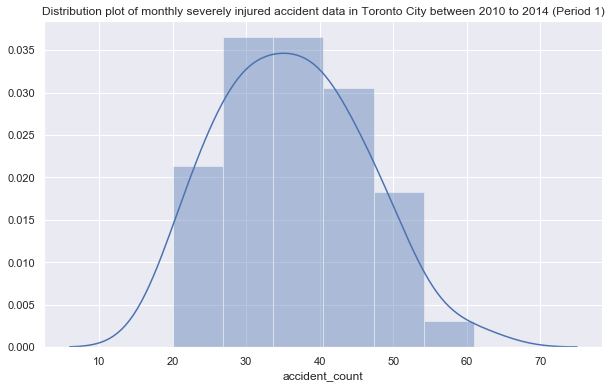

In [53]:
plt.figure(figsize=(10, 6))
sns.distplot(sample_one_ts.accident_count)
plt.title("Distribution plot of monthly severely injured accident data in Toronto City between 2010 to 2014 (Period 1)");
plt.savefig('HYP-d.png', bbox_inches='tight')

In [54]:
sample_two_ts=pd.DataFrame(sample_two.accident_count.resample('M').sum())

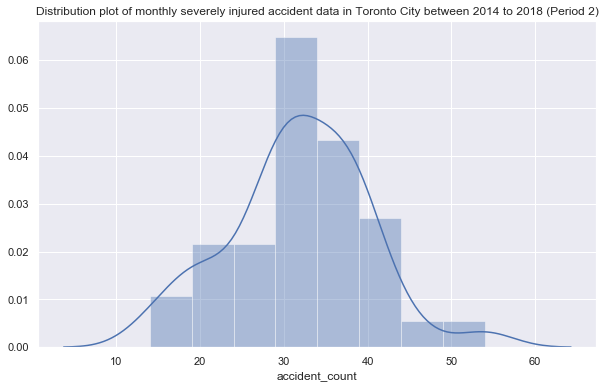

In [55]:
plt.figure(figsize=(10, 6))
sns.distplot(sample_two_ts.accident_count)
plt.title('Distribution plot of monthly severely injured accident data in Toronto City between 2014 to 2018 (Period 2)');
plt.savefig('HYP-e.png', bbox_inches='tight')

In [56]:
print("2010-2014")
print(sample_one_ts.describe())

print("\n","2014-2018")
print(sample_two_ts.describe())

2010-2014
       accident_count
count       48.000000
mean        36.145833
std          9.549400
min         20.000000
25%         29.000000
50%         36.000000
75%         42.000000
max         61.000000

 2014-2018
       accident_count
count       37.000000
mean        31.783784
std          8.313761
min         14.000000
25%         28.000000
50%         31.000000
75%         37.000000
max         54.000000


**Null hypothesis**, $H_{0}$ $=$ 36

**Alternate hypothesis** $H_{A}$ < 36

__Observing the Samples__:
1. Data sets are independant observation
2. Data sets are near normal or normal distribution
3. Observations are > 30
4. There are no outliers

Level of Significance for test = 5%

# 4.3	Observations from one sample t-test:

After running a one-sampled t-test using stats package in python, following are the results obtained:

    - Ttest_1sampResult(statistic=-3.191493260106139, pvalue=0.002933657930410994)

Above results indicate that the probability of observing mean value of 36 by chance is very less than significance level of 0.05. Hence Null Hypothesis can be rejected and Alternate Hypothesis can be accepted

In [57]:
#One sample t-test
stats.ttest_1samp(sample_two_ts.accident_count, sample_one_ts.accident_count.mean())

Ttest_1sampResult(statistic=-3.191493260106139, pvalue=0.002933657930410994)

# 4.4	Observations from two-sampled t-test

After running a two-sampled t-test using stats package in python, following are the results obtained:

Ttest_indResult(statistic=2.207044382194242, pvalue=0.030071942211035207)

Above results indicate that the probability of observing two samples having an identical average by chance is very less than significance level of 0.05. Hence Null Hypothesis can be rejected and Alternate Hypothesis can be accepted.

In [58]:
# two sample t-test
# Null hypothesis: Two independant samples have identical average
# Alternate hypothesis: Two independant samples does not have identical average

stats.ttest_ind(sample_one_ts['accident_count'], sample_two_ts['accident_count'])

Ttest_indResult(statistic=2.207044382194242, pvalue=0.030071942211035207)

# 5.0	Conclusion:

Data set having information on Killed or Seriously injured accidents in Toronto area between 2007 to 2017 was analysed with two key objectives: 
1) Build a model which predicts the severity of an accident in the event an accident occurs in Toronto city based on various parameters 
2) Test the alternate hypothesis that monthly rate of accidents resulting in serious injury has declined in the last 4-year period (2014-2018) when compared with its previous 4-year period (2010-2014). 

Prediction model was built using Random Forest Classifier method and Logistic Regression method. While Random Forest Classifier approach resulted in ~39% accuracy, Logistic Regression approach resulted only in ~38% accuracy. Also, tuning the model did not result in significant increase in accuracy scores. As both the models have only < 50% accuracy score, prediction models cannot be treated final and used in Production for real use. This suggests that there are more opportunities to broaden the data set by adding more data attributes and/or adapt different approach to improve the accuracy score of the prediction model.

Alternate hypothesis was tested using both one sampled and two-sampled t-test and the results indicate that the null hypothesis which states there is no difference between severely injured accident rate between two periods under study (2010-2014 & 2014-2018) can be rejected and alternate hypothesis which states that there is a decline in severely injured accident rate from 2010-14 period to 2014-18 can be safely accepted.


# 6.0	Reference:
- https://en.wikipedia.org/wiki/List_of_countries_by_traffic-related_death_rate
- https://data.torontopolice.on.ca/datasets/ksi
- https://en.wikipedia.org/wiki/Statistical_hypothesis_testing
- https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/
- https://en.wikipedia.org/wiki/Random_forest

# Appendix 
## Additional Code for Plotting in Maps


**Geopandas Libraries**

import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

**SHP File Read**

g2 = gpd.read_file('WARD_WGS84.shp')

**Geopandas dataframe**

geometry = [Point(xy) for xy in zip(df1.longitude,df1.latitude)]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df2, crs = crs, geometry = geometry)

**Plot - Subplots (2)**

fig,axs = plt.subplots(2,1,figsize = (20,20))

**First Plot**

axs[0] = g2.plot(ax = axs[0], alpha = 1, color = 'grey')
geo_df[geo_df.critically_injured == 1].plot(ax=axs[0],markersize=10,color = 'red', 
                                            marker = 'x', label = 'injury',alpha = 0.5,)
axs[0].set_title('Accidents With Critical Injury Reported', fontsize=20)
axs[0].axis('off')

**Second Plot**

axs[1] = g2.plot(ax = axs[1], alpha = 1, color = 'grey')
geo_df[geo_df.critically_injured == 0].plot(ax=axs[1],markersize=10,color = 'blue',
                                            marker = 'x', label = 'injury',alpha = 0.5)
axs[1].set_title('Accidents Without A Critical Injury Reported', fontsize=20)
plt.axis('off')
axs[1].axis('off')

fig.suptitle('Accidents Criticality Plot', fontsize= 32)

plt.subplots_adjust(top=0.93)

plt.savefig('Map1.png', bbox_inches='tight')

**Geopandas dataframe**

geometry = [Point(xy) for xy in zip(raw_data.longitude,raw_data.latitude)]
crs = {'init': 'epsg:4326'}
geo_df1 = gpd.GeoDataFrame(raw_data, crs = crs, geometry = geometry)

**SHP File Read**

g2 = gpd.read_file('WARD_WGS84.shp')

**Plot - Subplots (2)**

fig,axs = plt.subplots(2,1,figsize = (20,20))

axs[0] = g2.plot(ax = axs[0], alpha = 1, color = 'grey')
geo_df1[geo_df1.alcohol == 'Yes'].plot(ax=axs[0],markersize=20,color = 'red', 
                                            marker = 'x', label = 'injury',alpha = 0.5,)
axs[0].set_title('Accidents Where Alcohol Involved', fontsize=20)
axs[0].axis('off')

**Second Plot**

axs[1] = g2.plot(ax = axs[1], alpha = 1, color = 'grey')
geo_df1[geo_df1.speeding == 'Yes'].plot(ax=axs[1],markersize=20,color = 'blue',
                                            marker = 'x', label = 'injury',alpha = 0.5)
axs[1].set_title('Accidents Where Speeding Involved', fontsize=20)
plt.axis('off')
axs[1].axis('off')

fig.suptitle('Accidents Speeding and Alcohol Plot', fontsize= 32)

plt.subplots_adjust(top=0.93)

plt.savefig('Map2.png', bbox_inches='tight')